In [1]:
# This file is a simple implementation of the 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
model = Sequential()
eurusd_train = pd.read_csv(r"C:\Users\edgil\Documents\Masters\dissertation\code64\data_set\eurusd_train_normed.csv")
eurusd_test = pd.read_csv(r"C:\Users\edgil\Documents\Masters\dissertation\code64\data_set\eurusd_test_normed.csv")
eurusd_train = eurusd_train.replace(np.nan, 0)
eurusd_test = eurusd_test.replace(np.nan, 0)

Using TensorFlow backend.


In [ ]:
from keras.models import Model # Dense
model.add(Dense(units=2, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
x_train = np.array([[1,1],[1,0],[0,1],[0,0]])
y_train = np.array([0,1,0,0])
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=5, batch_size=32)

NameError: name 'Dense' is not defined

In [3]:
# set up the training data for the model
# we must normalise the inputs so they can pick up the correct values
data = [[[(i+j)/100]for i in range(0,5)] for j in range(0,200)]
target = [[(i+5)/100] for i in range(0,100)]
npData = np.array(data, dtype = float)
npTarget = np.array(target, dtype = float)
npData.shape
x_train, x_test, y_train, y_test = train_test_split(npData,npTarget,test_size = 0.2, random_state = 4)
# data stored as data[row_obversation][first_col_data][value_of_col]

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

In [2]:
# TODO Friday-> Tomorrow
# Get LSTM model working with your train,test data first
# get it learning and giving output. Then look to refine the model. think about the target, how will we create probability distributions? 
# get the EURUSD data
# Chose the trainign size of the data
DATA_SIZE = 5000
#npData.shape
train_original = eurusd_train.iloc[-DATA_SIZE:,:]
test_original = eurusd_test.iloc[:DATA_SIZE,:]
features_to_use = ["spot_v_HF", "spot_v_MF", "spot_v_LF", "HF_ema_diff", "MF_ema_diff","LF_ema_diff", "LDN", "NY", "Asia", "target"]
# Data needs to be reshaped into 3D tensor
train_sample = eurusd_train[features_to_use].iloc[-DATA_SIZE:,:].values
test_sample = eurusd_test[features_to_use].iloc[:DATA_SIZE,:].values
#sample_data['target'] = 1
#target.shape
# this creates your dataset with the lookback periods it needs to use.

import numpy as np
# this lookbacks over a set period as the memory for the LSTM
look_back = 60
def create_dataset(dataset, populate_target ,look_back=look_back):
  dataX, dataY, target_dates = [], [], []
  for i in range(len(dataset)-look_back+1):
      # this takes the very last col as the target
    a = dataset[i:(i+look_back), :-1]
    dataX.append(a)
    # this code assumes that the target vector is the very last col.
    dataY.append(dataset[i + look_back - 1, -1])
    if populate_target:
        target_dates.append(test_original['Date'].loc[i + look_back - 1])
  return np.array(dataX), np.array(dataY), target_dates

train_sample_transformed = create_dataset(train_sample,False, look_back)
train_data = train_sample_transformed[0]
train_target = train_sample_transformed[1]

test_sample_transformed = create_dataset(test_sample, True, look_back)
test_data = test_sample_transformed[0]
test_target = test_sample_transformed[1]
target_dates = test_sample_transformed[2]

# reshape sems to add another list around every observation
train_data = train_data.reshape(train_data.shape[0], look_back, train_data.shape[2])
train_target = train_target.reshape(train_target.shape[0], 1)

test_data = test_data.reshape(test_data.shape[0], look_back, test_data.shape[2])
test_target = test_target.reshape(test_target.shape[0], 1)


In [17]:
#
#print(eurusd_train.iloc[-200:,:])
#from matplotlib import pyplot as plt
x = eurusd_train.iloc[-DATA_SIZE:,-1:].reset_index(drop = True)
y = eurusd_test.iloc[:DATA_SIZE,:].reset_index(drop = True)
#x.iloc[:,0].plot()
#y.iloc[:,0].plot()
#print(x.head(60))
#print(train_target)
print(len(target_dates))


291


In [102]:
#rough work
"""
dataset = eurusd.iloc[:100,:].values
i = 0
look_back = 5
dataX, dataY = [], []
a = dataset[i:(i+look_back), :]
#dataX.append(a)
dataY.append(dataset[i + look_back - 1, -1])
dataY
"""

'\ndataset = eurusd.iloc[:100,:].values\ni = 0\nlook_back = 5\ndataX, dataY = [], []\na = dataset[i:(i+look_back), :]\n#dataX.append(a)\ndataY.append(dataset[i + look_back - 1, -1])\ndataY\n'

In [193]:
#sample_data = sample_data.reshape(sample_data.shape[0], sample_data.shape[1], sample_data.shape[3])
#sample_data[0]

In [3]:
# this code sets up the LSTM model.
'''
Original
model = Sequential()
model.add(LSTM((1),batch_input_shape = (None,5,1), return_sequences = True))
model.add(LSTM((1), return_sequences = False))
model.compile(loss = "mean_absolute_error", optimizer="adam", metrics = ['accuracy'])
model.summary()
'''
# need to try understand the input shapes and what is required of it.
# look at tutorials where they use this data
# Friday:GOAL have the LSTM working with your input (and variable data set)
# BONUS GOAL: simulate trendy and mean reverty data.
# batch_input_shape (no_obversations,timelookback, features)
# set batch size (this is how often the weights will update
# from kras moodule
# keras.layers.LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', 
# recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
# recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
# recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
# recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)
BATCH_SIZE = 300
no_features = train_data.shape[2]
model = Sequential()
model.add(LSTM(4,batch_input_shape = (None,look_back,no_features), return_sequences = True))
model.add(LSTM(1, return_sequences = False, activation="softmax"))
#model.add(Dense(2, activation= "softmax"))
model.compile(loss = "mean_absolute_error", optimizer="adam", metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 4)             224       
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 24        
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


In [6]:
# model training
'''
history = model.fit(x_train,y_train, epochs=100,validation_data=(x_test,y_test))
results = model.predict(x_test)
'''
history = model.fit(train_data,train_target,epochs = 10,validation_data=(test_data,test_target), verbose=1)

Train on 4941 samples, validate on 4941 samples
Epoch 1/10
  32/4941 [..............................] - ETA: 13s - loss: 0.9492 - acc: 0.0625

  64/4941 [..............................] - ETA: 12s - loss: 1.0288 - acc: 0.0625

  96/4941 [..............................] - ETA: 11s - loss: 1.0440 - acc: 0.0521

 128/4941 [..............................] - ETA: 10s - loss: 1.0295 - acc: 0.0625



 160/4941 [..............................] - ETA: 12s - loss: 1.0099 - acc: 0.0625



 192/4941 [>.............................] - ETA: 12s - loss: 1.0005 - acc: 0.0677

 224/4941 [>.............................] - ETA: 12s - loss: 1.0145 - acc: 0.0625

 256/4941 [>.............................] - ETA: 11s - loss: 1.0205 - acc: 0.0664

 288/4941 [>.............................] - ETA: 11s - loss: 1.0086 - acc: 0.0694

 320/4941 [>.............................] - ETA: 11s - loss: 1.0002 - acc: 0.0781

 352/4941 [=>............................] - ETA: 11s - loss: 1.0016 - acc: 0.0795



 384/4941 [=>............................] - ETA: 10s - loss: 1.0107 - acc: 0.0729



 416/4941 [=>............................] - ETA: 10s - loss: 1.0057 - acc: 0.0745



 448/4941 [=>............................] - ETA: 10s - loss: 1.0107 - acc: 0.0714

 512/4941 [==>...........................] - ETA: 10s - loss: 1.0117 - acc: 0.0684



 576/4941 [==>...........................] - ETA: 9s - loss: 1.0074 - acc: 0.0712 



 640/4941 [==>...........................] - ETA: 9s - loss: 1.0153 - acc: 0.0703

 672/4941 [===>..........................] - ETA: 9s - loss: 1.0136 - acc: 0.0729

 704/4941 [===>..........................] - ETA: 9s - loss: 1.0153 - acc: 0.0724

 736/4941 [===>..........................] - ETA: 9s - loss: 1.0202 - acc: 0.0707

 768/4941 [===>..........................] - ETA: 9s - loss: 1.0199 - acc: 0.0690

 800/4941 [===>..........................] - ETA: 8s - loss: 1.0157 - acc: 0.0700



 832/4941 [====>.........................] - ETA: 9s - loss: 1.0156 - acc: 0.0697

 864/4941 [====>.........................] - ETA: 9s - loss: 1.0151 - acc: 0.0683

 896/4941 [====>.........................] - ETA: 9s - loss: 1.0078 - acc: 0.0692

 928/4941 [====>.........................] - ETA: 8s - loss: 1.0074 - acc: 0.0700

 960/4941 [====>.........................] - ETA: 8s - loss: 1.0045 - acc: 0.0719

1024/4941 [=====>........................] - ETA: 8s - loss: 1.0070 - acc: 0.0684

1088/4941 [=====>........................] - ETA: 8s - loss: 1.0115 - acc: 0.0653

1120/4941 [=====>........................] - ETA: 8s - loss: 1.0109 - acc: 0.0661

1152/4941 [=====>........................] - ETA: 9s - loss: 1.0136 - acc: 0.0642

1184/4941 [======>.......................] - ETA: 9s - loss: 1.0139 - acc: 0.0642

1216/4941 [======>.......................] - ETA: 8s - loss: 1.0104 - acc: 0.0658

1248/4941 [======>.......................] - ETA: 8s - loss: 1.0122 - acc: 0.0657

1280/4941 [======>.......................] - ETA: 8s - loss: 1.0135 - acc: 0.0656

1312/4941 [======>.......................] - ETA: 8s - loss: 1.0105 - acc: 0.0655

1344/4941 [=======>......................] - ETA: 8s - loss: 1.0104 - acc: 0.0662

1376/4941 [=======>......................] - ETA: 8s - loss: 1.0100 - acc: 0.0661

1408/4941 [=======>......................] - ETA: 8s - loss: 1.0088 - acc: 0.0696

1440/4941 [=======>......................] - ETA: 8s - loss: 1.0051 - acc: 0.0694

1504/4941 [========>.....................] - ETA: 8s - loss: 1.0073 - acc: 0.0691

1536/4941 [========>.....................] - ETA: 7s - loss: 1.0057 - acc: 0.0684

1600/4941 [========>.....................] - ETA: 7s - loss: 1.0071 - acc: 0.0681

1632/4941 [========>.....................] - ETA: 7s - loss: 1.0078 - acc: 0.0692

1664/4941 [=========>....................] - ETA: 7s - loss: 1.0073 - acc: 0.0685



1728/4941 [=========>....................] - ETA: 7s - loss: 1.0081 - acc: 0.0677

1792/4941 [=========>....................] - ETA: 6s - loss: 1.0085 - acc: 0.0664

1824/4941 [==========>...................] - ETA: 6s - loss: 1.0081 - acc: 0.0669



1856/4941 [==========>...................] - ETA: 6s - loss: 1.0072 - acc: 0.0663

1888/4941 [==========>...................] - ETA: 6s - loss: 1.0078 - acc: 0.0673

1920/4941 [==========>...................] - ETA: 6s - loss: 1.0065 - acc: 0.0682

1952/4941 [==========>...................] - ETA: 6s - loss: 1.0075 - acc: 0.0671



1984/4941 [===========>..................] - ETA: 6s - loss: 1.0075 - acc: 0.0665

2016/4941 [===========>..................] - ETA: 6s - loss: 1.0080 - acc: 0.0670

2048/4941 [===========>..................] - ETA: 6s - loss: 1.0059 - acc: 0.0674

2080/4941 [===========>..................] - ETA: 6s - loss: 1.0066 - acc: 0.0663

2112/4941 [===========>..................] - ETA: 6s - loss: 1.0057 - acc: 0.0658

2144/4941 [============>.................] - ETA: 6s - loss: 1.0067 - acc: 0.0648

2176/4941 [============>.................] - ETA: 6s - loss: 1.0063 - acc: 0.0648

2208/4941 [============>.................] - ETA: 6s - loss: 1.0057 - acc: 0.0661



2240/4941 [============>.................] - ETA: 5s - loss: 1.0064 - acc: 0.0656

2272/4941 [============>.................] - ETA: 6s - loss: 1.0069 - acc: 0.0651

2304/4941 [============>.................] - ETA: 6s - loss: 1.0062 - acc: 0.0660

2336/4941 [=============>................] - ETA: 6s - loss: 1.0070 - acc: 0.0659

2368/4941 [=============>................] - ETA: 5s - loss: 1.0060 - acc: 0.0667



2400/4941 [=============>................] - ETA: 5s - loss: 1.0067 - acc: 0.0675

2432/4941 [=============>................] - ETA: 5s - loss: 1.0073 - acc: 0.0670



2464/4941 [=============>................] - ETA: 5s - loss: 1.0081 - acc: 0.0678

2496/4941 [==============>...............] - ETA: 5s - loss: 1.0076 - acc: 0.0677

2528/4941 [==============>...............] - ETA: 5s - loss: 1.0087 - acc: 0.0676

2560/4941 [==============>...............] - ETA: 5s - loss: 1.0084 - acc: 0.0680

2592/4941 [==============>...............] - ETA: 5s - loss: 1.0091 - acc: 0.0671



2624/4941 [==============>...............] - ETA: 5s - loss: 1.0085 - acc: 0.0682



2656/4941 [===============>..............] - ETA: 5s - loss: 1.0091 - acc: 0.0678

2688/4941 [===============>..............] - ETA: 5s - loss: 1.0081 - acc: 0.0673

2720/4941 [===============>..............] - ETA: 5s - loss: 1.0085 - acc: 0.0673

2752/4941 [===============>..............] - ETA: 5s - loss: 1.0071 - acc: 0.0676

2784/4941 [===============>..............] - ETA: 5s - loss: 1.0074 - acc: 0.0672

2816/4941 [================>.............] - ETA: 4s - loss: 1.0075 - acc: 0.0671



2848/4941 [================>.............] - ETA: 4s - loss: 1.0070 - acc: 0.0674

2880/4941 [================>.............] - ETA: 4s - loss: 1.0064 - acc: 0.0670

2912/4941 [================>.............] - ETA: 4s - loss: 1.0057 - acc: 0.0673

2944/4941 [================>.............] - ETA: 4s - loss: 1.0059 - acc: 0.0683

2976/4941 [=================>............] - ETA: 4s - loss: 1.0049 - acc: 0.0689

3008/4941 [=================>............] - ETA: 4s - loss: 1.0049 - acc: 0.0685

3040/4941 [=================>............] - ETA: 4s - loss: 1.0047 - acc: 0.0688

3072/4941 [=================>............] - ETA: 4s - loss: 1.0054 - acc: 0.0684

3104/4941 [=================>............] - ETA: 4s - loss: 1.0058 - acc: 0.0677

3136/4941 [==================>...........] - ETA: 4s - loss: 1.0063 - acc: 0.0673

3168/4941 [==================>...........] - ETA: 4s - loss: 1.0060 - acc: 0.0672

3200/4941 [==================>...........] - ETA: 4s - loss: 1.0046 - acc: 0.0681

3232/4941 [==================>...........] - ETA: 4s - loss: 1.0043 - acc: 0.0681



3264/4941 [==================>...........] - ETA: 4s - loss: 1.0050 - acc: 0.0680

3296/4941 [===================>..........] - ETA: 4s - loss: 1.0050 - acc: 0.0680

3328/4941 [===================>..........] - ETA: 4s - loss: 1.0057 - acc: 0.0676

3360/4941 [===================>..........] - ETA: 3s - loss: 1.0049 - acc: 0.0682

3392/4941 [===================>..........] - ETA: 3s - loss: 1.0054 - acc: 0.0678

3424/4941 [===================>..........] - ETA: 3s - loss: 1.0051 - acc: 0.0672

3456/4941 [===================>..........] - ETA: 3s - loss: 1.0056 - acc: 0.0666

3488/4941 [====================>.........] - ETA: 3s - loss: 1.0048 - acc: 0.0668



3520/4941 [====================>.........] - ETA: 3s - loss: 1.0048 - acc: 0.0665

3552/4941 [====================>.........] - ETA: 3s - loss: 1.0047 - acc: 0.0659

3584/4941 [====================>.........] - ETA: 3s - loss: 1.0050 - acc: 0.0656

3616/4941 [====================>.........] - ETA: 3s - loss: 1.0051 - acc: 0.0650

3648/4941 [=====================>........] - ETA: 3s - loss: 1.0059 - acc: 0.0650

3680/4941 [=====================>........] - ETA: 3s - loss: 1.0050 - acc: 0.0649



3712/4941 [=====================>........] - ETA: 3s - loss: 1.0058 - acc: 0.0644

3744/4941 [=====================>........] - ETA: 3s - loss: 1.0056 - acc: 0.0652

3776/4941 [=====================>........] - ETA: 2s - loss: 1.0054 - acc: 0.0654

3808/4941 [======================>.......] - ETA: 2s - loss: 1.0045 - acc: 0.0657

3840/4941 [======================>.......] - ETA: 2s - loss: 1.0052 - acc: 0.0656

3872/4941 [======================>.......] - ETA: 2s - loss: 1.0052 - acc: 0.0653

3904/4941 [======================>.......] - ETA: 2s - loss: 1.0042 - acc: 0.0653

3936/4941 [======================>.......] - ETA: 2s - loss: 1.0037 - acc: 0.0653

3968/4941 [=======================>......] - ETA: 2s - loss: 1.0025 - acc: 0.0650

4000/4941 [=======================>......] - ETA: 2s - loss: 1.0035 - acc: 0.0645



4032/4941 [=======================>......] - ETA: 2s - loss: 1.0026 - acc: 0.0645

4064/4941 [=======================>......] - ETA: 2s - loss: 1.0019 - acc: 0.0652

4096/4941 [=======================>......] - ETA: 2s - loss: 1.0016 - acc: 0.0647

4128/4941 [========================>.....] - ETA: 2s - loss: 1.0010 - acc: 0.0652

4160/4941 [========================>.....] - ETA: 2s - loss: 1.0003 - acc: 0.0656

4192/4941 [========================>.....] - ETA: 1s - loss: 1.0005 - acc: 0.0658

4224/4941 [========================>.....] - ETA: 1s - loss: 1.0012 - acc: 0.0653

4256/4941 [========================>.....] - ETA: 1s - loss: 1.0015 - acc: 0.0658

4288/4941 [=========================>....] - ETA: 1s - loss: 1.0011 - acc: 0.0655

4320/4941 [=========================>....] - ETA: 1s - loss: 1.0014 - acc: 0.0653

4352/4941 [=========================>....] - ETA: 1s - loss: 1.0014 - acc: 0.0653

4384/4941 [=========================>....] - ETA: 1s - loss: 1.0016 - acc: 0.0650

4416/4941 [=========================>....] - ETA: 1s - loss: 1.0016 - acc: 0.0648

4448/4941 [==========================>...] - ETA: 1s - loss: 1.0016 - acc: 0.0647

4480/4941 [==========================>...] - ETA: 1s - loss: 1.0014 - acc: 0.0645

4512/4941 [==========================>...] - ETA: 1s - loss: 1.0011 - acc: 0.0645



4544/4941 [==========================>...] - ETA: 1s - loss: 1.0011 - acc: 0.0640

4576/4941 [==========================>...] - ETA: 0s - loss: 1.0016 - acc: 0.0636

4608/4941 [==========================>...] - ETA: 0s - loss: 1.0020 - acc: 0.0632

4640/4941 [===========================>..] - ETA: 0s - loss: 1.0016 - acc: 0.0631



4672/4941 [===========================>..] - ETA: 0s - loss: 1.0021 - acc: 0.0631

4704/4941 [===========================>..] - ETA: 0s - loss: 1.0020 - acc: 0.0629

4736/4941 [===========================>..] - ETA: 0s - loss: 1.0019 - acc: 0.0627

4768/4941 [===========================>..] - ETA: 0s - loss: 1.0020 - acc: 0.0625

4800/4941 [============================>.] - ETA: 0s - loss: 1.0017 - acc: 0.0627

4832/4941 [============================>.] - ETA: 0s - loss: 1.0019 - acc: 0.0623

4864/4941 [============================>.] - ETA: 0s - loss: 1.0018 - acc: 0.0623

4896/4941 [============================>.] - ETA: 0s - loss: 1.0020 - acc: 0.0623



4928/4941 [============================>.] - ETA: 0s - loss: 1.0022 - acc: 0.0623

4941/4941 [==============================] - 15s 3ms/step - loss: 1.0027 - acc: 0.0621 - val_loss: 0.9561 - val_acc: 0.3795


Epoch 2/10
  32/4941 [..............................] - ETA: 10s - loss: 0.9528 - acc: 0.0938

  64/4941 [..............................] - ETA: 11s - loss: 0.9879 - acc: 0.0938

  96/4941 [..............................] - ETA: 11s - loss: 0.9844 - acc: 0.0729

 128/4941 [..............................] - ETA: 10s - loss: 0.9712 - acc: 0.0703



 160/4941 [..............................] - ETA: 10s - loss: 0.9857 - acc: 0.0625

 192/4941 [>.............................] - ETA: 10s - loss: 0.9920 - acc: 0.0677

 224/4941 [>.............................] - ETA: 10s - loss: 0.9987 - acc: 0.0580



 256/4941 [>.............................] - ETA: 9s - loss: 0.9974 - acc: 0.0586 



 288/4941 [>.............................] - ETA: 10s - loss: 0.9917 - acc: 0.0694

 320/4941 [>.............................] - ETA: 10s - loss: 0.9928 - acc: 0.0688

 352/4941 [=>............................] - ETA: 10s - loss: 0.9942 - acc: 0.0653

 384/4941 [=>............................] - ETA: 9s - loss: 0.9981 - acc: 0.0625 

 416/4941 [=>............................] - ETA: 9s - loss: 1.0098 - acc: 0.0601

 448/4941 [=>............................] - ETA: 9s - loss: 1.0098 - acc: 0.0580

 480/4941 [=>............................] - ETA: 9s - loss: 1.0042 - acc: 0.0563



 512/4941 [==>...........................] - ETA: 9s - loss: 1.0075 - acc: 0.0547

 544/4941 [==>...........................] - ETA: 9s - loss: 1.0062 - acc: 0.0588

 576/4941 [==>...........................] - ETA: 9s - loss: 1.0077 - acc: 0.0590

 608/4941 [==>...........................] - ETA: 9s - loss: 1.0053 - acc: 0.0609

 640/4941 [==>...........................] - ETA: 9s - loss: 1.0017 - acc: 0.0625



 672/4941 [===>..........................] - ETA: 9s - loss: 1.0049 - acc: 0.0625

 704/4941 [===>..........................] - ETA: 9s - loss: 1.0032 - acc: 0.0639

 736/4941 [===>..........................] - ETA: 9s - loss: 1.0059 - acc: 0.0625

 768/4941 [===>..........................] - ETA: 9s - loss: 1.0052 - acc: 0.0612

 800/4941 [===>..........................] - ETA: 9s - loss: 1.0054 - acc: 0.0587



 832/4941 [====>.........................] - ETA: 8s - loss: 1.0063 - acc: 0.0577

 864/4941 [====>.........................] - ETA: 8s - loss: 1.0057 - acc: 0.0590

 896/4941 [====>.........................] - ETA: 8s - loss: 1.0024 - acc: 0.0592

 928/4941 [====>.........................] - ETA: 8s - loss: 1.0033 - acc: 0.0593



 960/4941 [====>.........................] - ETA: 8s - loss: 1.0029 - acc: 0.0594

 992/4941 [=====>........................] - ETA: 8s - loss: 1.0033 - acc: 0.0585

1024/4941 [=====>........................] - ETA: 8s - loss: 1.0021 - acc: 0.0596

1056/4941 [=====>........................] - ETA: 8s - loss: 1.0039 - acc: 0.0578

1088/4941 [=====>........................] - ETA: 8s - loss: 1.0061 - acc: 0.0561



1120/4941 [=====>........................] - ETA: 8s - loss: 1.0035 - acc: 0.0545

1152/4941 [=====>........................] - ETA: 8s - loss: 1.0009 - acc: 0.0573

1184/4941 [======>.......................] - ETA: 8s - loss: 0.9999 - acc: 0.0566

1216/4941 [======>.......................] - ETA: 8s - loss: 1.0004 - acc: 0.0567



1248/4941 [======>.......................] - ETA: 8s - loss: 0.9983 - acc: 0.0577

1280/4941 [======>.......................] - ETA: 8s - loss: 0.9980 - acc: 0.0578



1312/4941 [======>.......................] - ETA: 8s - loss: 0.9975 - acc: 0.0564

1344/4941 [=======>......................] - ETA: 8s - loss: 0.9981 - acc: 0.0558

1376/4941 [=======>......................] - ETA: 8s - loss: 0.9999 - acc: 0.0552

1408/4941 [=======>......................] - ETA: 8s - loss: 0.9983 - acc: 0.0554

1440/4941 [=======>......................] - ETA: 8s - loss: 0.9983 - acc: 0.0549

1472/4941 [=======>......................] - ETA: 8s - loss: 0.9971 - acc: 0.0550



1504/4941 [========>.....................] - ETA: 8s - loss: 0.9951 - acc: 0.0559

1536/4941 [========>.....................] - ETA: 8s - loss: 0.9960 - acc: 0.0560

1568/4941 [========>.....................] - ETA: 7s - loss: 0.9954 - acc: 0.0548

1600/4941 [========>.....................] - ETA: 7s - loss: 0.9955 - acc: 0.0556

1632/4941 [========>.....................] - ETA: 7s - loss: 0.9952 - acc: 0.0564

1664/4941 [=========>....................] - ETA: 7s - loss: 0.9953 - acc: 0.0553

1696/4941 [=========>....................] - ETA: 7s - loss: 0.9968 - acc: 0.0554

1728/4941 [=========>....................] - ETA: 7s - loss: 0.9956 - acc: 0.0556

1760/4941 [=========>....................] - ETA: 7s - loss: 0.9957 - acc: 0.0551



1792/4941 [=========>....................] - ETA: 7s - loss: 0.9961 - acc: 0.0547

1824/4941 [==========>...................] - ETA: 7s - loss: 0.9958 - acc: 0.0543

1856/4941 [==========>...................] - ETA: 7s - loss: 0.9945 - acc: 0.0555



1888/4941 [==========>...................] - ETA: 7s - loss: 0.9942 - acc: 0.0567

1920/4941 [==========>...................] - ETA: 7s - loss: 0.9935 - acc: 0.0573

1952/4941 [==========>...................] - ETA: 6s - loss: 0.9918 - acc: 0.0574

1984/4941 [===========>..................] - ETA: 6s - loss: 0.9923 - acc: 0.0570

2016/4941 [===========>..................] - ETA: 6s - loss: 0.9919 - acc: 0.0570

2048/4941 [===========>..................] - ETA: 6s - loss: 0.9916 - acc: 0.0581



2080/4941 [===========>..................] - ETA: 6s - loss: 0.9903 - acc: 0.0577

2112/4941 [===========>..................] - ETA: 6s - loss: 0.9902 - acc: 0.0573

2144/4941 [============>.................] - ETA: 6s - loss: 0.9901 - acc: 0.0574

2176/4941 [============>.................] - ETA: 6s - loss: 0.9894 - acc: 0.0579

2208/4941 [============>.................] - ETA: 6s - loss: 0.9890 - acc: 0.0571

2240/4941 [============>.................] - ETA: 6s - loss: 0.9882 - acc: 0.0576

2304/4941 [============>.................] - ETA: 6s - loss: 0.9880 - acc: 0.0582

2336/4941 [=============>................] - ETA: 5s - loss: 0.9870 - acc: 0.0582

2368/4941 [=============>................] - ETA: 5s - loss: 0.9871 - acc: 0.0583



2400/4941 [=============>................] - ETA: 5s - loss: 0.9855 - acc: 0.0592



2432/4941 [=============>................] - ETA: 5s - loss: 0.9862 - acc: 0.0592



2464/4941 [=============>................] - ETA: 5s - loss: 0.9871 - acc: 0.0593

2496/4941 [==============>...............] - ETA: 5s - loss: 0.9868 - acc: 0.0593



2528/4941 [==============>...............] - ETA: 5s - loss: 0.9871 - acc: 0.0589

2560/4941 [==============>...............] - ETA: 5s - loss: 0.9881 - acc: 0.0586



2592/4941 [==============>...............] - ETA: 5s - loss: 0.9884 - acc: 0.0590

2624/4941 [==============>...............] - ETA: 5s - loss: 0.9901 - acc: 0.0583



2656/4941 [===============>..............] - ETA: 5s - loss: 0.9911 - acc: 0.0576

2688/4941 [===============>..............] - ETA: 5s - loss: 0.9904 - acc: 0.0577

2720/4941 [===============>..............] - ETA: 4s - loss: 0.9914 - acc: 0.0577



2752/4941 [===============>..............] - ETA: 4s - loss: 0.9908 - acc: 0.0574

2784/4941 [===============>..............] - ETA: 4s - loss: 0.9906 - acc: 0.0578



2816/4941 [================>.............] - ETA: 4s - loss: 0.9900 - acc: 0.0582

2848/4941 [================>.............] - ETA: 4s - loss: 0.9906 - acc: 0.0579



2880/4941 [================>.............] - ETA: 4s - loss: 0.9932 - acc: 0.0576

2912/4941 [================>.............] - ETA: 4s - loss: 0.9926 - acc: 0.0584

2944/4941 [================>.............] - ETA: 4s - loss: 0.9925 - acc: 0.0577

2976/4941 [=================>............] - ETA: 4s - loss: 0.9921 - acc: 0.0575

3008/4941 [=================>............] - ETA: 4s - loss: 0.9925 - acc: 0.0572

3040/4941 [=================>............] - ETA: 4s - loss: 0.9918 - acc: 0.0576

3072/4941 [=================>............] - ETA: 4s - loss: 0.9916 - acc: 0.0579



3104/4941 [=================>............] - ETA: 4s - loss: 0.9917 - acc: 0.0583

3136/4941 [==================>...........] - ETA: 4s - loss: 0.9911 - acc: 0.0580

3168/4941 [==================>...........] - ETA: 4s - loss: 0.9911 - acc: 0.0587

3200/4941 [==================>...........] - ETA: 4s - loss: 0.9915 - acc: 0.0587

3232/4941 [==================>...........] - ETA: 4s - loss: 0.9906 - acc: 0.0591



3264/4941 [==================>...........] - ETA: 3s - loss: 0.9903 - acc: 0.0591



3296/4941 [===================>..........] - ETA: 3s - loss: 0.9904 - acc: 0.0592

3328/4941 [===================>..........] - ETA: 3s - loss: 0.9906 - acc: 0.0589

3360/4941 [===================>..........] - ETA: 3s - loss: 0.9896 - acc: 0.0595

3392/4941 [===================>..........] - ETA: 3s - loss: 0.9896 - acc: 0.0590

3424/4941 [===================>..........] - ETA: 3s - loss: 0.9893 - acc: 0.0593

3456/4941 [===================>..........] - ETA: 3s - loss: 0.9889 - acc: 0.0596

3488/4941 [====================>.........] - ETA: 3s - loss: 0.9883 - acc: 0.0602

3520/4941 [====================>.........] - ETA: 3s - loss: 0.9892 - acc: 0.0599

3552/4941 [====================>.........] - ETA: 3s - loss: 0.9894 - acc: 0.0597

3584/4941 [====================>.........] - ETA: 3s - loss: 0.9889 - acc: 0.0605



3616/4941 [====================>.........] - ETA: 3s - loss: 0.9886 - acc: 0.0608



3648/4941 [=====================>........] - ETA: 3s - loss: 0.9898 - acc: 0.0603



3680/4941 [=====================>........] - ETA: 3s - loss: 0.9897 - acc: 0.0603

3712/4941 [=====================>........] - ETA: 2s - loss: 0.9902 - acc: 0.0603

3744/4941 [=====================>........] - ETA: 2s - loss: 0.9905 - acc: 0.0601



3776/4941 [=====================>........] - ETA: 2s - loss: 0.9906 - acc: 0.0601

3808/4941 [======================>.......] - ETA: 2s - loss: 0.9903 - acc: 0.0604

3840/4941 [======================>.......] - ETA: 2s - loss: 0.9901 - acc: 0.0607

3872/4941 [======================>.......] - ETA: 2s - loss: 0.9903 - acc: 0.0610



3904/4941 [======================>.......] - ETA: 2s - loss: 0.9905 - acc: 0.0612



3936/4941 [======================>.......] - ETA: 2s - loss: 0.9914 - acc: 0.0607

3968/4941 [=======================>......] - ETA: 2s - loss: 0.9920 - acc: 0.0605



4000/4941 [=======================>......] - ETA: 2s - loss: 0.9924 - acc: 0.0600

4032/4941 [=======================>......] - ETA: 2s - loss: 0.9919 - acc: 0.0608



4064/4941 [=======================>......] - ETA: 2s - loss: 0.9918 - acc: 0.0605

4096/4941 [=======================>......] - ETA: 2s - loss: 0.9917 - acc: 0.0603



4128/4941 [========================>.....] - ETA: 1s - loss: 0.9922 - acc: 0.0598



4160/4941 [========================>.....] - ETA: 1s - loss: 0.9912 - acc: 0.0601



4192/4941 [========================>.....] - ETA: 1s - loss: 0.9919 - acc: 0.0601



4224/4941 [========================>.....] - ETA: 1s - loss: 0.9921 - acc: 0.0599



4256/4941 [========================>.....] - ETA: 1s - loss: 0.9914 - acc: 0.0604



4288/4941 [=========================>....] - ETA: 1s - loss: 0.9918 - acc: 0.0604



4320/4941 [=========================>....] - ETA: 1s - loss: 0.9918 - acc: 0.0609

4352/4941 [=========================>....] - ETA: 1s - loss: 0.9915 - acc: 0.0611

4384/4941 [=========================>....] - ETA: 1s - loss: 0.9910 - acc: 0.0607

4416/4941 [=========================>....] - ETA: 1s - loss: 0.9905 - acc: 0.0609



4448/4941 [==========================>...] - ETA: 1s - loss: 0.9910 - acc: 0.0607

4480/4941 [==========================>...] - ETA: 1s - loss: 0.9917 - acc: 0.0605

4512/4941 [==========================>...] - ETA: 1s - loss: 0.9920 - acc: 0.0612

4544/4941 [==========================>...] - ETA: 0s - loss: 0.9911 - acc: 0.0614

4576/4941 [==========================>...] - ETA: 0s - loss: 0.9911 - acc: 0.0614



4608/4941 [==========================>...] - ETA: 0s - loss: 0.9921 - acc: 0.0612

4640/4941 [===========================>..] - ETA: 0s - loss: 0.9919 - acc: 0.0614



4672/4941 [===========================>..] - ETA: 0s - loss: 0.9914 - acc: 0.0612

4704/4941 [===========================>..] - ETA: 0s - loss: 0.9906 - acc: 0.0619

4736/4941 [===========================>..] - ETA: 0s - loss: 0.9908 - acc: 0.0619

4768/4941 [===========================>..] - ETA: 0s - loss: 0.9906 - acc: 0.0619

4800/4941 [============================>.] - ETA: 0s - loss: 0.9908 - acc: 0.0619

4832/4941 [============================>.] - ETA: 0s - loss: 0.9909 - acc: 0.0615

4864/4941 [============================>.] - ETA: 0s - loss: 0.9911 - acc: 0.0611

4896/4941 [============================>.] - ETA: 0s - loss: 0.9906 - acc: 0.0611

4928/4941 [============================>.] - ETA: 0s - loss: 0.9906 - acc: 0.0611

4941/4941 [==============================] - 13s 3ms/step - loss: 0.9902 - acc: 0.0609 - val_loss: 0.9544 - val_acc: 0.3756


Epoch 3/10
  32/4941 [..............................] - ETA: 9s - loss: 1.0350 - acc: 0.0312

  64/4941 [..............................] - ETA: 8s - loss: 1.0573 - acc: 0.0469

  96/4941 [..............................] - ETA: 9s - loss: 1.0478 - acc: 0.0312

 128/4941 [..............................] - ETA: 9s - loss: 1.0115 - acc: 0.0469



 160/4941 [..............................] - ETA: 9s - loss: 1.0052 - acc: 0.0563



 192/4941 [>.............................] - ETA: 8s - loss: 1.0000 - acc: 0.0833



 224/4941 [>.............................] - ETA: 8s - loss: 0.9935 - acc: 0.0714

 256/4941 [>.............................] - ETA: 9s - loss: 1.0004 - acc: 0.0703



 288/4941 [>.............................] - ETA: 8s - loss: 1.0018 - acc: 0.0694



 320/4941 [>.............................] - ETA: 8s - loss: 1.0064 - acc: 0.0719

 352/4941 [=>............................] - ETA: 8s - loss: 0.9984 - acc: 0.0767

 384/4941 [=>............................] - ETA: 8s - loss: 1.0020 - acc: 0.0729

 416/4941 [=>............................] - ETA: 8s - loss: 0.9982 - acc: 0.0745

 448/4941 [=>............................] - ETA: 8s - loss: 1.0008 - acc: 0.0692

 480/4941 [=>............................] - ETA: 8s - loss: 1.0063 - acc: 0.0646



 512/4941 [==>...........................] - ETA: 8s - loss: 1.0065 - acc: 0.0664



 544/4941 [==>...........................] - ETA: 8s - loss: 1.0102 - acc: 0.0643



 576/4941 [==>...........................] - ETA: 8s - loss: 1.0097 - acc: 0.0625



 608/4941 [==>...........................] - ETA: 8s - loss: 1.0124 - acc: 0.0609



 640/4941 [==>...........................] - ETA: 8s - loss: 1.0124 - acc: 0.0578

 672/4941 [===>..........................] - ETA: 8s - loss: 1.0181 - acc: 0.0565

 704/4941 [===>..........................] - ETA: 7s - loss: 1.0170 - acc: 0.0568

 736/4941 [===>..........................] - ETA: 7s - loss: 1.0150 - acc: 0.0571



 768/4941 [===>..........................] - ETA: 7s - loss: 1.0150 - acc: 0.0560

 800/4941 [===>..........................] - ETA: 7s - loss: 1.0148 - acc: 0.0563

 832/4941 [====>.........................] - ETA: 7s - loss: 1.0188 - acc: 0.0541

 864/4941 [====>.........................] - ETA: 9s - loss: 1.0145 - acc: 0.0544

 896/4941 [====>.........................] - ETA: 9s - loss: 1.0097 - acc: 0.0547

 928/4941 [====>.........................] - ETA: 9s - loss: 1.0105 - acc: 0.0528

 960/4941 [====>.........................] - ETA: 9s - loss: 1.0105 - acc: 0.0531

 992/4941 [=====>........................] - ETA: 9s - loss: 1.0073 - acc: 0.0534

1024/4941 [=====>........................] - ETA: 9s - loss: 1.0071 - acc: 0.0547



1088/4941 [=====>........................] - ETA: 8s - loss: 1.0046 - acc: 0.0542

1152/4941 [=====>........................] - ETA: 8s - loss: 1.0070 - acc: 0.0521



1216/4941 [======>.......................] - ETA: 8s - loss: 1.0058 - acc: 0.0551

1248/4941 [======>.......................] - ETA: 8s - loss: 1.0070 - acc: 0.0561



1280/4941 [======>.......................] - ETA: 7s - loss: 1.0065 - acc: 0.0570

1344/4941 [=======>......................] - ETA: 7s - loss: 1.0033 - acc: 0.0573

1376/4941 [=======>......................] - ETA: 7s - loss: 1.0036 - acc: 0.0574

1440/4941 [=======>......................] - ETA: 7s - loss: 1.0008 - acc: 0.0569



1504/4941 [========>.....................] - ETA: 7s - loss: 0.9994 - acc: 0.0572

1536/4941 [========>.....................] - ETA: 7s - loss: 0.9979 - acc: 0.0573

1568/4941 [========>.....................] - ETA: 6s - loss: 0.9997 - acc: 0.0580

1600/4941 [========>.....................] - ETA: 6s - loss: 0.9990 - acc: 0.0594

1632/4941 [========>.....................] - ETA: 6s - loss: 1.0001 - acc: 0.0588

1696/4941 [=========>....................] - ETA: 6s - loss: 0.9950 - acc: 0.0613



1760/4941 [=========>....................] - ETA: 6s - loss: 0.9917 - acc: 0.0614



1824/4941 [==========>...................] - ETA: 6s - loss: 0.9896 - acc: 0.0614



1888/4941 [==========>...................] - ETA: 5s - loss: 0.9883 - acc: 0.0614

1952/4941 [==========>...................] - ETA: 5s - loss: 0.9870 - acc: 0.0615

2016/4941 [===========>..................] - ETA: 5s - loss: 0.9860 - acc: 0.0605

2080/4941 [===========>..................] - ETA: 5s - loss: 0.9867 - acc: 0.0611

2144/4941 [============>.................] - ETA: 5s - loss: 0.9840 - acc: 0.0644

2208/4941 [============>.................] - ETA: 5s - loss: 0.9822 - acc: 0.0661

2272/4941 [============>.................] - ETA: 4s - loss: 0.9814 - acc: 0.0678



2336/4941 [=============>................] - ETA: 4s - loss: 0.9801 - acc: 0.0693



2400/4941 [=============>................] - ETA: 4s - loss: 0.9808 - acc: 0.0683

2464/4941 [=============>................] - ETA: 4s - loss: 0.9807 - acc: 0.0678

2528/4941 [==============>...............] - ETA: 4s - loss: 0.9801 - acc: 0.0688



2592/4941 [==============>...............] - ETA: 4s - loss: 0.9812 - acc: 0.0687

2656/4941 [===============>..............] - ETA: 4s - loss: 0.9819 - acc: 0.0681

2720/4941 [===============>..............] - ETA: 3s - loss: 0.9825 - acc: 0.0680



2784/4941 [===============>..............] - ETA: 3s - loss: 0.9831 - acc: 0.0682

2848/4941 [================>.............] - ETA: 3s - loss: 0.9845 - acc: 0.0681

2880/4941 [================>.............] - ETA: 3s - loss: 0.9852 - acc: 0.0674

2912/4941 [================>.............] - ETA: 3s - loss: 0.9855 - acc: 0.0680

2944/4941 [================>.............] - ETA: 3s - loss: 0.9851 - acc: 0.0679

2976/4941 [=================>............] - ETA: 3s - loss: 0.9845 - acc: 0.0682

3040/4941 [=================>............] - ETA: 3s - loss: 0.9844 - acc: 0.0688



3104/4941 [=================>............] - ETA: 3s - loss: 0.9847 - acc: 0.0683



3168/4941 [==================>...........] - ETA: 3s - loss: 0.9845 - acc: 0.0682



3232/4941 [==================>...........] - ETA: 2s - loss: 0.9859 - acc: 0.0678

3264/4941 [==================>...........] - ETA: 2s - loss: 0.9865 - acc: 0.0674

3328/4941 [===================>..........] - ETA: 2s - loss: 0.9877 - acc: 0.0670



3392/4941 [===================>..........] - ETA: 2s - loss: 0.9871 - acc: 0.0672

3424/4941 [===================>..........] - ETA: 2s - loss: 0.9875 - acc: 0.0669

3488/4941 [====================>.........] - ETA: 2s - loss: 0.9890 - acc: 0.0665



3552/4941 [====================>.........] - ETA: 2s - loss: 0.9882 - acc: 0.0673



3616/4941 [====================>.........] - ETA: 2s - loss: 0.9877 - acc: 0.0678

3680/4941 [=====================>........]

 - ETA: 2s - loss: 0.9874 - acc: 0.0682

3744/4941 [=====================>........] - ETA: 2s - loss: 0.9854 - acc: 0.0694



3808/4941 [======================>.......] - ETA: 1s - loss: 0.9852 - acc: 0.0693



3872/4941 [======================>.......] - ETA: 1s - loss: 0.9838 - acc: 0.0690

3936/4941 [======================>.......] - ETA: 1s - loss: 0.9837 - acc: 0.0686

4000/4941 [=======================>......] - ETA: 1s - loss: 0.9840 - acc: 0.0688

4032/4941 [=======================>......] - ETA: 1s - loss: 0.9834 - acc: 0.0694

4064/4941 [=======================>......] - ETA: 1s - loss: 0.9827 - acc: 0.0699

4096/4941 [=======================>......] - ETA: 1s - loss: 0.9820 - acc: 0.0703

4128/4941 [========================>.....] - ETA: 1s - loss: 0.9811 - acc: 0.0707

4160/4941 [========================>.....] - ETA: 1s - loss: 0.9816 - acc: 0.0702

4192/4941 [========================>.....] - ETA: 1s - loss: 0.9821 - acc: 0.0701

4224/4941 [========================>.....] - ETA: 1s - loss: 0.9821 - acc: 0.0708

4256/4941 [========================>.....] - ETA: 1s - loss: 0.9822 - acc: 0.0705

4288/4941 [=========================>....] - ETA: 1s - loss: 0.9824 - acc: 0.0707

4320/4941 [=========================>....] - ETA: 1s - loss: 0.9827 - acc: 0.0708

4352/4941 [=========================>....] - ETA: 1s - loss: 0.9831 - acc: 0.0705

4384/4941 [=========================>....] - ETA: 1s - loss: 0.9833 - acc: 0.0705

4416/4941 [=========================>....] - ETA: 0s - loss: 0.9831 - acc: 0.0709

4448/4941 [==========================>...] - ETA: 0s - loss: 0.9828 - acc: 0.0713



4480/4941 [==========================>...] - ETA: 0s - loss: 0.9839 - acc: 0.0708



4512/4941 [==========================>...] - ETA: 0s - loss: 0.9838 - acc: 0.0703

4544/4941 [==========================>...] - ETA: 0s - loss: 0.9831 - acc: 0.0704

4576/4941 [==========================>...] - ETA: 0s - loss: 0.9829 - acc: 0.0706

4608/4941 [==========================>...] - ETA: 0s - loss: 0.9837 - acc: 0.0703

4640/4941 [===========================>..] - ETA: 0s - loss: 0.9842 - acc: 0.0700

4704/4941 [===========================>..] - ETA: 0s - loss: 0.9842 - acc: 0.0693

4736/4941 [===========================>..] - ETA: 0s - loss: 0.9837 - acc: 0.0697

4800/4941 [============================>.] - ETA: 0s - loss: 0.9831 - acc: 0.0704



4832/4941 [============================>.] - ETA: 0s - loss: 0.9833 - acc: 0.0704

4864/4941 [============================>.] - ETA: 0s - loss: 0.9836 - acc: 0.0703

4928/4941 [============================>.] - ETA: 0s - loss: 0.9834 - acc: 0.0708

4941/4941 [==============================] - 11s 2ms/step - loss: 0.9837 - acc: 0.0706 - val_loss: 0.9503 - val_acc: 0.4098


Epoch 4/10
  32/4941 [..............................] - ETA: 7s - loss: 0.9753 - acc: 0.0938

  64/4941 [..............................] - ETA: 7s - loss: 1.0118 - acc: 0.0781



 128/4941 [..............................] - ETA: 7s - loss: 0.9672 - acc: 0.0938

 192/4941 [>.............................] - ETA: 16s - loss: 0.9911 - acc: 0.0781

 224/4941 [>.............................] - ETA: 15s - loss: 0.9903 - acc: 0.0714

 256/4941 [>.............................] - ETA: 14s - loss: 0.9950 - acc: 0.0664



 288/4941 [>.............................] - ETA: 13s - loss: 0.9936 - acc: 0.0799

 320/4941 [>.............................] - ETA: 13s - loss: 0.9891 - acc: 0.0781

 352/4941 [=>............................] - ETA: 12s - loss: 0.9849 - acc: 0.0852

 384/4941 [=>............................] - ETA: 12s - loss: 0.9894 - acc: 0.0859

 448/4941 [=>............................] - ETA: 11s - loss: 0.9952 - acc: 0.0871

 480/4941 [=>............................] - ETA: 11s - loss: 0.9983 - acc: 0.0833

 512/4941 [==>...........................] - ETA: 10s - loss: 0.9970 - acc: 0.0840

 576/4941 [==>...........................] - ETA: 12s - loss: 0.9989 - acc: 0.0799

 608/4941 [==>...........................] - ETA: 13s - loss: 0.9935 - acc: 0.0839

 640/4941 [==>...........................] - ETA: 13s - loss: 0.9924 - acc: 0.0828



 672/4941 [===>..........................] - ETA: 13s - loss: 0.9948 - acc: 0.0804

 704/4941 [===>..........................] - ETA: 13s - loss: 0.9883 - acc: 0.0838

 736/4941 [===>..........................] - ETA: 12s - loss: 0.9904 - acc: 0.0815



 768/4941 [===>..........................] - ETA: 12s - loss: 0.9876 - acc: 0.0833



 800/4941 [===>..........................] - ETA: 12s - loss: 0.9860 - acc: 0.0813

 864/4941 [====>.........................] - ETA: 11s - loss: 0.9847 - acc: 0.0822



 928/4941 [====>.........................] - ETA: 11s - loss: 0.9872 - acc: 0.0819



 992/4941 [=====>........................] - ETA: 10s - loss: 0.9854 - acc: 0.0827



1056/4941 [=====>........................] - ETA: 10s - loss: 0.9859 - acc: 0.0881



1120/4941 [=====>........................] - ETA: 9s - loss: 0.9890 - acc: 0.0875 



1184/4941 [======>.......................] - ETA: 9s - loss: 0.9891 - acc: 0.0861



1248/4941 [======>.......................] - ETA: 8s - loss: 0.9861 - acc: 0.0849



1312/4941 [======>.......................] - ETA: 8s - loss: 0.9861 - acc: 0.0854

1344/4941 [=======>......................] - ETA: 8s - loss: 0.9882 - acc: 0.0848

1408/4941 [=======>......................] - ETA: 8s - loss: 0.9865 - acc: 0.0866



1472/4941 [=======>......................] - ETA: 7s - loss: 0.9861 - acc: 0.0863

1536/4941 [========>.....................] - ETA: 7s - loss: 0.9885 - acc: 0.0853



1568/4941 [========>.....................] - ETA: 7s - loss: 0.9898 - acc: 0.0848

1600/4941 [========>.....................] - ETA: 7s - loss: 0.9902 - acc: 0.0838

1632/4941 [========>.....................] - ETA: 7s - loss: 0.9891 - acc: 0.0846

1664/4941 [=========>....................] - ETA: 7s - loss: 0.9859 - acc: 0.0853

1696/4941 [=========>....................] - ETA: 7s - loss: 0.9852 - acc: 0.0855

1728/4941 [=========>....................] - ETA: 7s - loss: 0.9850 - acc: 0.0851



1760/4941 [=========>....................] - ETA: 7s - loss: 0.9837 - acc: 0.0858

1792/4941 [=========>....................] - ETA: 7s - loss: 0.9830 - acc: 0.0859



1824/4941 [==========>...................] - ETA: 7s - loss: 0.9831 - acc: 0.0861

1856/4941 [==========>...................] - ETA: 7s - loss: 0.9827 - acc: 0.0851



1888/4941 [==========>...................] - ETA: 7s - loss: 0.9823 - acc: 0.0847

1920/4941 [==========>...................] - ETA: 6s - loss: 0.9839 - acc: 0.0839

1952/4941 [==========>...................] - ETA: 6s - loss: 0.9847 - acc: 0.0845

2016/4941 [===========>..................] - ETA: 6s - loss: 0.9823 - acc: 0.0848



2080/4941 [===========>..................] - ETA: 6s - loss: 0.9822 - acc: 0.0875

2144/4941 [============>.................] - ETA: 6s - loss: 0.9846 - acc: 0.0863

2208/4941 [============>.................] - ETA: 5s - loss: 0.9833 - acc: 0.0879



2272/4941 [============>.................] - ETA: 5s - loss: 0.9833 - acc: 0.0871

2304/4941 [============>.................] - ETA: 5s - loss: 0.9838 - acc: 0.0864

2368/4941 [=============>................] - ETA: 5s - loss: 0.9824 - acc: 0.0857

2432/4941 [=============>................] - ETA: 5s - loss: 0.9831 - acc: 0.0855

2496/4941 [==============>...............] - ETA: 5s - loss: 0.9828 - acc: 0.0849

2528/4941 [==============>...............] - ETA: 5s - loss: 0.9837 - acc: 0.0850

2592/4941 [==============>...............] - ETA: 4s - loss: 0.9857 - acc: 0.0849



2624/4941 [==============>...............] - ETA: 4s - loss: 0.9856 - acc: 0.0850

2656/4941 [===============>..............] - ETA: 4s - loss: 0.9863 - acc: 0.0843

2688/4941 [===============>..............] - ETA: 4s - loss: 0.9864 - acc: 0.0848

2720/4941 [===============>..............] - ETA: 4s - loss: 0.9852 - acc: 0.0857



2784/4941 [===============>..............] - ETA: 4s - loss: 0.9822 - acc: 0.0873

2816/4941 [================>.............] - ETA: 4s - loss: 0.9806 - acc: 0.0888

2880/4941 [================>.............] - ETA: 4s - loss: 0.9816 - acc: 0.0889

2944/4941 [================>.............] - ETA: 4s - loss: 0.9828 - acc: 0.0880

3008/4941 [=================>............] - ETA: 3s - loss: 0.9829 - acc: 0.0884



3072/4941 [=================>............] - ETA: 3s - loss: 0.9829 - acc: 0.0882



3136/4941 [==================>...........] - ETA: 3s - loss: 0.9810 - acc: 0.0886

3200/4941 [==================>...........] - ETA: 3s - loss: 0.9811 - acc: 0.0875

3232/4941 [==================>...........] - ETA: 3s - loss: 0.9816 - acc: 0.0879

3296/4941 [===================>..........] - ETA: 3s - loss: 0.9809 - acc: 0.0889



3360/4941 [===================>..........] - ETA: 3s - loss: 0.9800 - acc: 0.0881



3424/4941 [===================>..........] - ETA: 2s - loss: 0.9792 - acc: 0.0870



3488/4941 [====================>.........] - ETA: 2s - loss: 0.9809 - acc: 0.0874

3552/4941 [====================>.........] - ETA: 2s - loss: 0.9815 - acc: 0.0867

3616/4941 [====================>.........] - ETA: 2s - loss: 0.9819 - acc: 0.0860



3680/4941 [=====================>........] - ETA: 2s - loss: 0.9818 - acc: 0.0861

3712/4941 [=====================>........] - ETA: 2s - loss: 0.9811 - acc: 0.0859

3776/4941 [=====================>........] - ETA: 2s - loss: 0.9807 - acc: 0.0858

3808/4941 [======================>.......] - ETA: 2s - loss: 0.9803 - acc: 0.0867

3840/4941 [======================>.......] - ETA: 2s - loss: 0.9806 - acc: 0.0867

3872/4941 [======================>.......] - ETA: 2s - loss: 0.9806 - acc: 0.0868

3904/4941 [======================>.......] - ETA: 1s - loss: 0.9807 - acc: 0.0866

3936/4941 [======================>.......] - ETA: 1s - loss: 0.9809 - acc: 0.0864



3968/4941 [=======================>......] - ETA: 1s - loss: 0.9800 - acc: 0.0872



4000/4941 [=======================>......] - ETA: 1s - loss: 0.9793 - acc: 0.0872



4032/4941 [=======================>......] - ETA: 1s - loss: 0.9785 - acc: 0.0875

4064/4941 [=======================>......] - ETA: 1s - loss: 0.9780 - acc: 0.0871

4096/4941 [=======================>......] - ETA: 1s - loss: 0.9773 - acc: 0.0867

4128/4941 [========================>.....] - ETA: 1s - loss: 0.9761 - acc: 0.0875

4160/4941 [========================>.....] - ETA: 1s - loss: 0.9761 - acc: 0.0873

4192/4941 [========================>.....] - ETA: 1s - loss: 0.9766 - acc: 0.0871



4224/4941 [========================>.....] - ETA: 1s - loss: 0.9760 - acc: 0.0874



4256/4941 [========================>.....] - ETA: 1s - loss: 0.9758 - acc: 0.0869



4288/4941 [=========================>....] - ETA: 1s - loss: 0.9762 - acc: 0.0868

4352/4941 [=========================>....] - ETA: 1s - loss: 0.9760 - acc: 0.0869

4384/4941 [=========================>....] - ETA: 1s - loss: 0.9762 - acc: 0.0865

4416/4941 [=========================>....] - ETA: 0s - loss: 0.9757 - acc: 0.0863

4480/4941 [==========================>...] - ETA: 0s - loss: 0.9759 - acc: 0.0864



4512/4941 [==========================>...] - ETA: 0s - loss: 0.9758 - acc: 0.0862

4576/4941 [==========================>...] - ETA: 0s - loss: 0.9766 - acc: 0.0852

4608/4941 [==========================>...] - ETA: 0s - loss: 0.9772 - acc: 0.0851

4640/4941 [===========================>..] - ETA: 0s - loss: 0.9778 - acc: 0.0849

4672/4941 [===========================>..] - ETA: 0s - loss: 0.9776 - acc: 0.0852

4704/4941 [===========================>..] - ETA: 0s - loss: 0.9776 - acc: 0.0850

4768/4941 [===========================>..] - ETA: 0s - loss: 0.9766 - acc: 0.0854

4800/4941 [============================>.] - ETA: 0s - loss: 0.9763 - acc: 0.0850



4832/4941 [============================>.] - ETA: 0s - loss: 0.9764 - acc: 0.0851

4864/4941 [============================>.] - ETA: 0s - loss: 0.9754 - acc: 0.0851

4896/4941 [============================>.] - ETA: 0s - loss: 0.9759 - acc: 0.0854

4928/4941 [============================>.] - ETA: 0s - loss: 0.9759 - acc: 0.0852

4941/4941 [==============================] - 11s 2ms/step - loss: 0.9764 - acc: 0.0850 - val_loss: 0.9455 - val_acc: 0.4159


Epoch 5/10
  32/4941 [..............................] - ETA: 7s - loss: 0.9794 - acc: 0.0938

  64/4941 [..............................] - ETA: 7s - loss: 0.9341 - acc: 0.1562

  96/4941 [..............................] - ETA: 8s - loss: 0.9209 - acc: 0.1354

 128/4941 [..............................] - ETA: 8s - loss: 0.9258 - acc: 0.1328

 192/4941 [>.............................] - ETA: 8s - loss: 0.9579 - acc: 0.1250

 224/4941 [>.............................] - ETA: 7s - loss: 0.9751 - acc: 0.1071

 256/4941 [>.............................] - ETA: 7s - loss: 0.9675 - acc: 0.1094

 288/4941 [>.............................] - ETA: 7s - loss: 0.9733 - acc: 0.1007

 320/4941 [>.............................] - ETA: 7s - loss: 0.9860 - acc: 0.0938

 384/4941 [=>............................] - ETA: 7s - loss: 0.9836 - acc: 0.0911

 416/4941 [=>............................] - ETA: 7s - loss: 0.9797 - acc: 0.0889

 480/4941 [=>............................] - ETA: 7s - loss: 0.9924 - acc: 0.0833

 512/4941 [==>...........................] - ETA: 7s - loss: 0.9884 - acc: 0.0840

 544/4941 [==>...........................] - ETA: 7s - loss: 0.9873 - acc: 0.0827

 576/4941 [==>...........................] - ETA: 7s - loss: 0.9794 - acc: 0.0868

 608/4941 [==>...........................] - ETA: 7s - loss: 0.9828 - acc: 0.0872

 640/4941 [==>...........................] - ETA: 7s - loss: 0.9781 - acc: 0.0875

 672/4941 [===>..........................] - ETA: 7s - loss: 0.9739 - acc: 0.0908

 704/4941 [===>..........................] - ETA: 7s - loss: 0.9706 - acc: 0.0923

 736/4941 [===>..........................] - ETA: 7s - loss: 0.9749 - acc: 0.0883

 768/4941 [===>..........................] - ETA: 7s - loss: 0.9768 - acc: 0.0872



 800/4941 [===>..........................] - ETA: 7s - loss: 0.9741 - acc: 0.0887

 832/4941 [====>.........................] - ETA: 6s - loss: 0.9704 - acc: 0.0913

 896/4941 [====>.........................] - ETA: 6s - loss: 0.9685 - acc: 0.0915

 928/4941 [====>.........................] - ETA: 6s - loss: 0.9702 - acc: 0.0894

 960/4941 [====>.........................] - ETA: 6s - loss: 0.9729 - acc: 0.0875

 992/4941 [=====>........................] - ETA: 6s - loss: 0.9705 - acc: 0.0887

1024/4941 [=====>........................] - ETA: 6s - loss: 0.9662 - acc: 0.0918



1056/4941 [=====>........................] - ETA: 6s - loss: 0.9648 - acc: 0.0938

1088/4941 [=====>........................] - ETA: 6s - loss: 0.9615 - acc: 0.0983

1152/4941 [=====>........................] - ETA: 6s - loss: 0.9595 - acc: 0.1016

1184/4941 [======>.......................] - ETA: 6s - loss: 0.9614 - acc: 0.0997

1216/4941 [======>.......................] - ETA: 6s - loss: 0.9649 - acc: 0.0987

1248/4941 [======>.......................] - ETA: 6s - loss: 0.9644 - acc: 0.1002

1280/4941 [======>.......................] - ETA: 6s - loss: 0.9639 - acc: 0.1023

1344/4941 [=======>......................] - ETA: 6s - loss: 0.9618 - acc: 0.1027

1376/4941 [=======>......................] - ETA: 6s - loss: 0.9642 - acc: 0.1025

1408/4941 [=======>......................] - ETA: 6s - loss: 0.9621 - acc: 0.1037

1440/4941 [=======>......................] - ETA: 5s - loss: 0.9597 - acc: 0.1062

1472/4941 [=======>......................] - ETA: 5s - loss: 0.9606 - acc: 0.1060

1504/4941 [========>.....................] - ETA: 5s - loss: 0.9604 - acc: 0.1077

1536/4941 [========>.....................]

 - ETA: 5s - loss: 0.9596 - acc: 0.1081



1568/4941 [========>.....................] - ETA: 5s - loss: 0.9609 - acc: 0.1065



1600/4941 [========>.....................] - ETA: 5s - loss: 0.9601 - acc: 0.1075

1632/4941 [========>.....................] - ETA: 5s - loss: 0.9591 - acc: 0.1109

1664/4941 [=========>....................] - ETA: 5s - loss: 0.9573 - acc: 0.1124

1696/4941 [=========>....................] - ETA: 5s - loss: 0.9564 - acc: 0.1126

1728/4941 [=========>....................] - ETA: 5s - loss: 0.9571 - acc: 0.1140

1760/4941 [=========>....................] - ETA: 5s - loss: 0.9571 - acc: 0.1153

1792/4941 [=========>....................] - ETA: 5s - loss: 0.9587 - acc: 0.1150



1824/4941 [==========>...................] - ETA: 5s - loss: 0.9592 - acc: 0.1162



1856/4941 [==========>...................] - ETA: 5s - loss: 0.9600 - acc: 0.1158



1888/4941 [==========>...................] - ETA: 5s - loss: 0.9613 - acc: 0.1165



1920/4941 [==========>...................] - ETA: 5s - loss: 0.9604 - acc: 0.1167

1952/4941 [==========>...................] - ETA: 5s - loss: 0.9623 - acc: 0.1163

1984/4941 [===========>..................] - ETA: 5s - loss: 0.9619 - acc: 0.1164

2016/4941 [===========>..................] - ETA: 5s - loss: 0.9620 - acc: 0.1171

2048/4941 [===========>..................] - ETA: 5s - loss: 0.9636 - acc: 0.1167

2080/4941 [===========>..................] - ETA: 5s - loss: 0.9647 - acc: 0.1154



2112/4941 [===========>..................] - ETA: 5s - loss: 0.9649 - acc: 0.1141

2144/4941 [============>.................] - ETA: 5s - loss: 0.9654 - acc: 0.1143



2176/4941 [============>.................] - ETA: 4s - loss: 0.9647 - acc: 0.1153



2208/4941 [============>.................] - ETA: 4s - loss: 0.9639 - acc: 0.1159



2240/4941 [============>.................] - ETA: 4s - loss: 0.9642 - acc: 0.1152

2272/4941 [============>.................] - ETA: 4s - loss: 0.9647 - acc: 0.1136



2304/4941 [============>.................] - ETA: 4s - loss: 0.9641 - acc: 0.1128



2336/4941 [=============>................] - ETA: 4s - loss: 0.9644 - acc: 0.1126

2368/4941 [=============>................] - ETA: 4s - loss: 0.9659 - acc: 0.1128

2400/4941 [=============>................] - ETA: 4s - loss: 0.9672 - acc: 0.1121

2432/4941 [=============>................] - ETA: 4s - loss: 0.9675 - acc: 0.1123

2464/4941 [=============>................] - ETA: 4s - loss: 0.9691 - acc: 0.1116

2496/4941 [==============>...............] - ETA: 4s - loss: 0.9688 - acc: 0.1126

2528/4941 [==============>...............] - ETA: 4s - loss: 0.9694 - acc: 0.1127



2560/4941 [==============>...............] - ETA: 4s - loss: 0.9692 - acc: 0.1133

2592/4941 [==============>...............] - ETA: 4s - loss: 0.9689 - acc: 0.1127

2624/4941 [==============>...............] - ETA: 4s - loss: 0.9701 - acc: 0.1113

2656/4941 [===============>..............] - ETA: 4s - loss: 0.9693 - acc: 0.1118

2688/4941 [===============>..............] - ETA: 4s - loss: 0.9693 - acc: 0.1124



2720/4941 [===============>..............] - ETA: 4s - loss: 0.9697 - acc: 0.1125



2752/4941 [===============>..............] - ETA: 4s - loss: 0.9692 - acc: 0.1126

2784/4941 [===============>..............] - ETA: 4s - loss: 0.9687 - acc: 0.1131

2816/4941 [================>.............] - ETA: 4s - loss: 0.9684 - acc: 0.1133

2848/4941 [================>.............] - ETA: 4s - loss: 0.9685 - acc: 0.1127

2880/4941 [================>.............] - ETA: 3s - loss: 0.9689 - acc: 0.1128

2912/4941 [================>.............] - ETA: 3s - loss: 0.9696 - acc: 0.1120

2944/4941 [================>.............] - ETA: 3s - loss: 0.9705 - acc: 0.1118

2976/4941 [=================>............] - ETA: 3s - loss: 0.9700 - acc: 0.1116

3008/4941 [=================>............] - ETA: 3s - loss: 0.9688 - acc: 0.1127



3040/4941 [=================>............] - ETA: 3s - loss: 0.9680 - acc: 0.1135

3072/4941 [=================>............] - ETA: 3s - loss: 0.9686 - acc: 0.1139



3104/4941 [=================>............] - ETA: 3s - loss: 0.9692 - acc: 0.1131



3136/4941 [==================>...........] - ETA: 3s - loss: 0.9706 - acc: 0.1126



3168/4941 [==================>...........] - ETA: 3s - loss: 0.9700 - acc: 0.1121

3200/4941 [==================>...........] - ETA: 3s - loss: 0.9689 - acc: 0.1125

3232/4941 [==================>...........] - ETA: 3s - loss: 0.9687 - acc: 0.1129

3264/4941 [==================>...........] - ETA: 3s - loss: 0.9681 - acc: 0.1127

3296/4941 [===================>..........] - ETA: 3s - loss: 0.9667 - acc: 0.1135



3328/4941 [===================>..........] - ETA: 3s - loss: 0.9677 - acc: 0.1139

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




KeyboardInterrupt



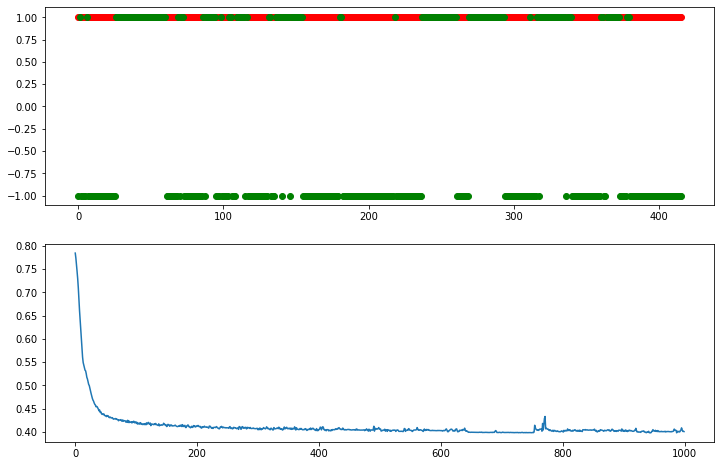

In [23]:
# plot results
import matplotlib.pyplot as plt
results = model.predict(test_data)
fig , ax = plt.subplots(2,1,figsize=(12,8))
ax[0].scatter(range(len(results)), results, c = "r")
ax[0].scatter(range(len(test_target)), test_target, c = "g")
# lets see the history of the error update.
ax[1].plot(history.history['loss'])
plt.show()

In [19]:
features_to_use = ["spot_v_HF", "spot_v_MF", "spot_v_LF", "HF_ema_diff",	"MF_ema_diff","LF_ema_diff"]
train_sample = eurusd_train[features_to_use].iloc[-DATA_SIZE:,:].values
#test_sample = eurusd_test.iloc[:200,features_to_use].values

array([[-3.77077251, -3.62112174, -2.03388392, -4.85746873, -2.01641818,
         0.33070086],
       [-4.09020146, -3.69558669, -2.07626712, -4.83655507, -2.02458851,
         0.32852463],
       [-4.60197656, -3.81557922, -2.1431084 , -4.86914407, -2.03328911,
         0.32627671],
       ...,
       [-0.80929306,  0.09202221, -0.31229262, -0.47708991, -0.71461784,
        -1.06383853],
       [-0.75726148,  0.09778996, -0.30904073, -0.46443473, -0.71445716,
        -1.06284846],
       [-0.68397369,  0.10862184, -0.30307008, -0.4479426 , -0.71424005,
        -1.06185307]])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def signal(x, thold):
    '''
    :param x: 
    :return: signal to trade 
    '''
    if x >= thold:
        return 1
    elif x <= (1-thold):
        return -1
    else:
        return 0
predicted = [signal(i, 0.65) for i in results]

true_class = [np.sign(i[0]) for i in test_target]
print(accuracy_score(true_class, predicted))

print(pd.DataFrame(
    confusion_matrix(true_class, predicted),
    columns=['Predicted Buy',"shithouse",'Predicted Sell'],
    index=['True Buy',"shithouse",'True Sell']
))
# To do --> Create a relatively realistic backtester (probably needs to be a .py file engine)
# Run the model on the real data (explore running on a server. tie a small subset of data to see how long it might actually take?
# test model on test data and see if returns work.
# create a timeseries that generates a trendy or non trendy price series on same frequency as the hourly eurusd data.
# test the model to see if it can pick this up. 
# potential GM questions, LSTM architecture? Best practises around standardisation? Are you implementing the notes and points reaised by the
# examiners?
# Ultimate GOAL: create a trend baseded model which can actually pick up price action and place bet sizes which are relatively intelligent.
# is there a way of testign some neuro fuzzy logic perhaps?
# Probabitily distribution of outcomes for each trade based on the trend and external factors

0.39663461538461536


ValueError: Shape of passed values is (2, 2), indices imply (3, 3)

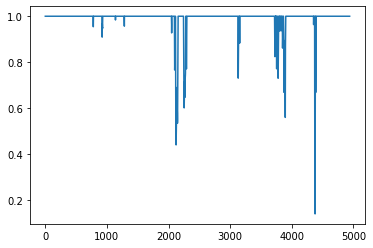

In [12]:
#single_sample = np.array([test_data[0]])
#print(model.predict(single_sample))
#print(results)
#print(eurusd_test.iloc[:200,:].head())
#test_original['Predictions'].shift(2)
plt.plot(results)

In [25]:
#backtester_type_code
#test_original['predicted'] = results
# mergeing signals to the df
predictions = pd.DataFrame({"Date" : target_dates,"Predictions": predicted})
test_original = pd.merge(test_original,predictions,how="left", on="Date").fillna(0)
test_original.columns

Index(['spot_v_HF', 'spot_v_MF', 'spot_v_LF', 'HF_ema_diff', 'MF_ema_diff',
       'LF_ema_diff', 'Date', 'CCY', 'logret', 'LDN', 'NY', 'Asia',
       'target_raw', 'target', 'Predictions'],
      dtype='object')

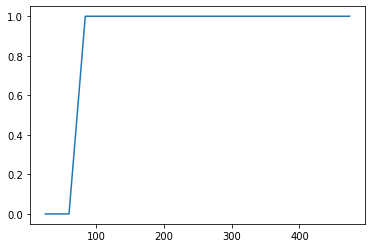

In [26]:
trade_horizon = 24
test_original["scaled_signal"] = test_original['Predictions'].shift(2).rolling(trade_horizon).sum()/trade_horizon
# no shift needed as we have already done that inpervious step
test_original['strat_returns'] = test_original['logret']*test_original['scaled_signal']
test_original['strat_returns_sum'] = test_original['strat_returns'].cumsum()
test_original["scaled_signal"].plot()
plt.show()

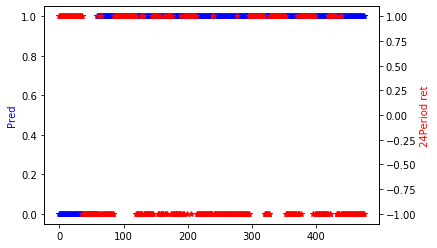

In [27]:
#print(test_original[['Date',"CCY","Predictions", "logret", "strat_returns"]].head(50)) # "strat_returns_sum", "logret"
# plotting the results
ax1 = plt.plot()
s1 = test_original['Predictions']
plt.plot(s1,'b*')
plt.ylabel('Pred',color='b')

ax2 = plt.gca().twinx()
s2 = test_original['target']
ax2.plot(s2, 'r*')
plt.ylabel('24Period ret', color='r')
plt.show()

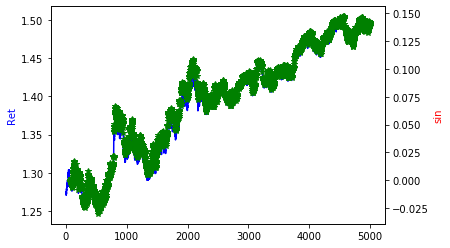

In [ ]:
# plotting the results

ax1 = plt.plot()
s1 = test_original['CCY']
plt.plot(s1,'b')
plt.ylabel('Ret',color='b')

ax2 = plt.gca().twinx()
s2 = test_original['strat_returns_sum'].loc[test_original['scaled_signal'] <0]
ax2.plot(s2, 'r*')
plt.ylabel('sin', color='r')
s3 = test_original['strat_returns_sum'].loc[test_original['scaled_signal'] >0]
ax2.plot(s3, 'g*')
plt.show()


In [14]:
test_original.to_csv(r"C:\Users\edgil\Documents\Masters\dissertation\code64\data_set\signal_prediction_30_lookback_500pok.csv",index = False)